### [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) with `food_vision` dataset

*ImageNet Classification with Deep Convolutional Neural Networks" by Alex Krizhevsky et al.*



In [16]:
### IMPORT LIBRARIES 

# libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchvision import datasets
# from tensorboardX import SummaryWriter

# others 
import os 
import wget
import glob
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from zipfile import ZipFile
from datetime import datetime
from pathlib import Path

# check `torch` verion and `torchvison` version
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

# check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# created date
print("Created date: 2023:07:15 19:51:44")

# modified date
now = datetime.now().strftime("%Y:%m:%d %H:%M:%S")
print(f"Modifed date: {now}")

torch version: 1.12.1+cu102
torchvision version: 0.13.1+cu102
Device: cuda
Created date: 2023:07:15 19:51:44
Modifed date: 2023:07:25 11:38:46


In [17]:
### DOWNLOAD AND EXTRACT DATA

# current dir 
root_dir = Path(os.getcwd())

# save directory to save datasets
save_dir = root_dir.joinpath("../../data")

# dataset file name
dataset_file_name = "10_food_classes_all_data.zip"
dataset_folder_name = "10_food_classes_all_data"
dataset_file = save_dir.joinpath(dataset_file_name)
dataset_folder = save_dir.joinpath(dataset_folder_name)

# check if the file exists
if dataset_file.is_file():
    print(f"The file {dataset_file_name} already exists in this directory: {save_dir}.\nSkipping downloading.")
else:
    print(f"The file '{dataset_file_name}' is downloading...")
    
    # dataset url
    url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

    # download the zip file
    wget.download(url=url, out=str(save_dir))

    print("Downloaded sucessfully !!!")

# extract the zip file
if dataset_folder.is_dir():
    print(f"The dataset folder `{dataset_folder_name}` is already exists. Skipping extracting!")
else: 

    # extract the zip file
    zipper = ZipFile(dataset_file)
    zipper.extractall(save_dir)
    zipper.close()

    # remove the zip file
    os.remove(dataset_file)

    print("Extracted sucessfully !!!")

The file 10_food_classes_all_data.zip already exists in this directory: /home/jason/Documents/TADAC/pdl/tadac/practice/../../data.
Skipping downloading.
The dataset folder `10_food_classes_all_data` is already exists. Skipping extracting!


In [18]:
### PREPROCESSING DATA
# train_data_dir
train_data_dir = dataset_folder.joinpath("train") 

# test_data_dir
test_data_dir = dataset_folder.joinpath("test") 

train_data_dir, test_data_dir

(PosixPath('/home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train'),
 PosixPath('/home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test'))

In [19]:
# os.walk in train_data_dir
for dirpaths, dirnames, filenames in os.walk(train_data_dir):
    print(f"There are {len(filenames)} images in {dirpaths}")

There are 0 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/pizza
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/steak
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/ice_cream
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/sushi
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/chicken_wings
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/chicken_curry
There are 750 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/train/ramen
There are 750 images in /home/jason/

In [20]:
# os.walk in train_data_dir
for dirpaths, dirnames, filenames in os.walk(test_data_dir):
    print(f"There are {len(filenames)} images in {dirpaths}")

There are 0 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/pizza
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/steak
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/ice_cream
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/sushi
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/chicken_wings
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/chicken_curry
There are 250 images in /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/ramen
There are 250 images in /home/jason/Document

Seleted image file: /home/jason/Documents/TADAC/pdl/tadac/practice/../../data/10_food_classes_all_data/test/steak/2649745.jpg
Shape of transformed image: torch.Size([3, 227, 227])
Shape of permuted image: torch.Size([227, 227, 3])


(-0.5, 226.5, 226.5, -0.5)

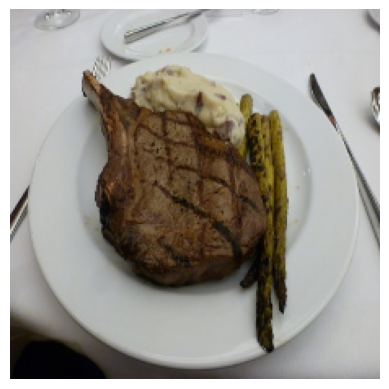

In [21]:
# display one random image
random_file = random.choice(sorted(glob.glob(str(test_data_dir.joinpath("steak/*")))))
print(f"Seleted image file: {random_file}")

# load image
image = Image.open(random_file)

# tranforms
tranform_helper = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(227,227))])
transformed_image = tranform_helper(image)
print(f"Shape of transformed image: {transformed_image.shape}")

# The desired ordering of dimensions 
# (3, 224, 224): [0, 1, 2] =>  (224, 224, 3) : [1, 2, 0] or [2, 1, 0]
permuted_image = transformed_image.permute(1,2,0) 
# permuted_image = transformed_image.permute(2,1,0) 
print(f"Shape of permuted image: {permuted_image.shape}")

# view image
plt.imshow(permuted_image)
plt.axis(False)

In [22]:
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(227),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.465, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# train dataset
train_dataset = datasets.ImageFolder(train_data_dir, transform=data_transform)

# test datate
test_dataset = datasets.ImageFolder(test_data_dir, transform=data_transform)


In [23]:
# class name
class_names = train_dataset.classes

# print out datasets
print(f"Class names: {class_names}")
print(f"Length of train data: {len(train_dataset)}")
print(f"Length of test data: {len(test_dataset)}")

Class names: ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
Length of train data: 7500
Length of test data: 2500


In [24]:
# batch_size 
batch_size = 32

# train_dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# test_dataloader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
# check one batch of train_dataloader
len(train_dataloader) # len(train_dataset / batchsize)

# check train_dataloader
print(f"{len(train_dataloader)} images in one batch")

# to verify
print(f"{round(len(train_dataset)/batch_size)} images in one batch")

235 images in one batch
234 images in one batch


In [26]:
### MODEL PARAMETERS && LOG DIRECTORY, CHECKPOINT DIRECTORY

# number of epochs
NUM_EPOCHS = 90

# batch size
BATCH_SIZE = 128 # SECTION 5

# momentum
MOMENTUM = 0.9 # SECTION 5

# learning rate decay
LR_DECAY = 0.0005 # SECTION 5

# learning rate init
LR_INIT = 0.01 # SECTION 5

# number of classes
NUM_CLASSES = 10 

# GPUs to use
DEVICE_IDS = [0, 1, 2, 3]

# log directory
LOG_DIR = root_dir.joinpath("../../logs")
if not LOG_DIR.is_dir():
    # create a logs dir 
    LOG_DIR.mkdir(parents=True, exist_ok=True)

# checkpoints directory
CHECKPOINT_DIR = root_dir.joinpath("../../models")
if not CHECKPOINT_DIR.is_dir():
    # create a checkpoint dir 
    CHECKPOINT_DIR.mkdir(parents=True, exist_ok=True)


In [27]:
### ALEXNET ARCHITECTURE

class AlexNet(nn.Module):
    """
    From the original paper [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) for a custom dataset `food_vision` with `10 classes`.
    """

    def __init__(self, input_shape=(3, 227, 227), output_shape=10) -> None:
        super().__init__()
        """ An AlexNet architecture with a custom dataset for food classification.

        Args: 
            input_shape (Tensor): input shape of a food dataset.
            output_shape (int): number of food classes.
        """

        self.block = nn.Sequential(

            # first conv layer
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4), # SECTION 3.5
            nn.ReLU(),
            # k = 2, n = 5, alpha=10^-4, beta=0.75
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2), # SECTION 3.3
            nn.MaxPool2d(kernel_size=3, stride=2), # SECTION 3.4

            # second conv layer
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            # k = 2, n = 5, alpha=10^-4, beta=0.75
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2), # SECTION 3.3
            nn.MaxPool2d(kernel_size=3, stride=2),

            # third conv layer
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1), # SECTION 3.5
            nn.ReLU(),

            # forth conv layer
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1), # SECTION 3.5
            nn.ReLU(),

            # fifth conv layer
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1), # SECTION 3.5
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5, inplace=True), # SECTION 4.2
            nn.Linear(in_features= (256*6*6), out_features=4096), # SECTION 3.5
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=True), # SECTION 4.2
            nn.Linear(in_features= 4096, out_features=1024), # SECTION 3.5
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=output_shape) # SECTION 3.5
        )

        # init weights and bias of conv layers
        for layer in self.block:
            if isinstance(layer, nn.Conv2d):

                # a zero-mean Gaussian distribution with standard deviation `0.01`
                nn.init.normal_(layer.weight, mean=0, std=0.01) # SECTION 5
                nn.init.constant_(layer.bias, 0) # SECTION 5

            # bias = 1 for the 2nd, 4th, 5th conv layers
            nn.init.constant_(self.block[4].bias, 1) # 2nd conv layer
            nn.init.constant_(self.block[10].bias, 1) # 4th conv layer
            nn.init.constant_(self.block[12].bias, 1) # 5th conv layer

        # init weights and bias of fully-connected hidden layers
        for layer in self.classifier:
            if isinstance(layer, nn.Linear):

                 # a zero-mean Gaussian distribution with standard deviation `0.01`
                nn.init.normal_(layer.weight, mean=0, std=0.01) # SECTION 5
                nn.init.constant_(layer.bias, 0) # SECTION 5
                

    def forward(self, x: torch.Tensor):
        """ Pass input through the AlexNet.

        Args:
            x (Tensor): input. 

        Returns:
            output (Tensor): output.
        """
        return self.classifier(self.block(x))

In [28]:
## MODEL SUMMARY

# send alexnet model to device
alexnet_model = AlexNet().to(device)

# default summary
print(alexnet_model)

# print out the model
summary(alexnet_model, batch_size=16, input_size=(3, 227, 227))

AlexNet(
  (block): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=True)
    (2): Linear(in_features=9216

In [30]:
### TRAINING LOOP

# tensorboard
# tb_writer = SummaryWriter(log_dir=LOG_DIR)

# epochs
epochs = 90

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer 
# optimizer = torch.optim.SGD(params=alexnet_model.parameters(), 
#                              lr=LR_INIT, 
#                              momentum=MOMENTUM,
#                              weight_decay=LR_DECAY)
optimizer = torch.optim.Adam(params=alexnet_model.parameters())


# mutiply LR by 1/10 after every 30 epochs
# lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# total steps
total_steps = 1

for epoch in range(epochs):

    # learning rate step
    # lr_scheduler.step()

    ### TRAINING
    accumulated_train_batches = 0
    accumulated_train_losses = 0.0
    accumulated_train_accuracy = 0.0

    for inputs, targets in train_dataloader:

        # send to device
        inputs = inputs.to(device)
        targets = targets.to(device)

        # train mode
        alexnet_model.train()

        # forward pass
        y_logits = alexnet_model(inputs)

        
        # calculate loss
        loss = loss_fn(y_logits.float(), targets.long())
        accumulated_train_losses += loss

        # calculate accuracy
        acc = torch.eq(targets, torch.argmax(torch.softmax(y_logits.data, dim=1), dim=1)).sum().item()
        accumulated_train_accuracy += acc

        # accumulate batches
        accumulated_train_batches += 1

        # set zero gradients
        optimizer.zero_grad()

        # calculate backpropagation
        loss.backward()

        # update parameters
        optimizer.step()
    
    train_loss = accumulated_train_losses / accumulated_train_batches
    train_acc = accumulated_train_accuracy / (accumulated_train_batches * batch_size)

    ### TESTING
    accumulated_test_batches = 0
    accumulated_test_losses = 0.0
    accumulated_test_accuracy = 0.0

    # eval mode
    alexnet_model.eval()
    with torch.inference_mode():
        for inputs, targets in test_dataloader:

            # send to device
            inputs = inputs.to(device)
            targets = targets.to(device)

            # forward pass
            y_logits = alexnet_model(inputs)
            
            # calculate loss
            loss = loss_fn(y_logits.float(), targets.long())
            accumulated_test_losses += loss

            # calculate accuracy
            acc = torch.eq(targets, torch.argmax(torch.softmax(y_logits.data, dim=1), dim=1)).sum().item()
            accumulated_test_accuracy += acc

            # accumulate batches
            accumulated_test_batches += 1
    
    test_loss = accumulated_test_losses / accumulated_test_batches
    test_acc = accumulated_test_accuracy / (accumulated_test_batches * batch_size)

    print(f"Epoch: {epoch}/{epochs} Train loss: {train_loss: .5f} | Train accuracy: {train_acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.cuda.FloatTensor [32, 4096]], which is output 0 of ReluBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

https://github.com/dansuh17/alexnet-pytorch/blob/d0c1b1c52296ffcbecfbf5b17e1d1685b4ca6744/model.py